# Housing Dataset Feature Selection

In [1]:
# Loading files and importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None)

In [35]:
df = pd.read_csv('train.csv')

In [36]:
#Getting first few records of given dataset
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [37]:
#Shape of dataset 
df.shape

(1460, 81)

In [38]:
#Getting info of the dataset
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [39]:
####Data Analysis-

In [40]:
minm = min(df['SalePrice'])
maxm = max(df['SalePrice'])
mean = np.mean(df['SalePrice'])
median = np.median(df['SalePrice'])
sd = np.std(df['SalePrice'])
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minm))
print("Maximum price: ${}".format(maxm))
print("Mean price: ${}".format(mean))
print("Median price ${}".format(median))
print("Standard deviation of prices: ${}".format(sd))

Statistics for Boston housing dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.19589041095
Median price $163000.0
Standard deviation of prices: $79415.29188606751


In [41]:
##Missing values

In [42]:
#df[1].isnull()
features_with_na = []
for i in df.columns:
    if df[i].isnull().sum() > 1 : 
        print (i ,'=', np.round((df[i].isnull().sum() / df[i].size * 100), 2), '% missing values')
        features_with_na.append(i)
        

LotFrontage = 17.74 % missing values
Alley = 93.77 % missing values
MasVnrType = 0.55 % missing values
MasVnrArea = 0.55 % missing values
BsmtQual = 2.53 % missing values
BsmtCond = 2.53 % missing values
BsmtExposure = 2.6 % missing values
BsmtFinType1 = 2.53 % missing values
BsmtFinType2 = 2.6 % missing values
FireplaceQu = 47.26 % missing values
GarageType = 5.55 % missing values
GarageYrBlt = 5.55 % missing values
GarageFinish = 5.55 % missing values
GarageQual = 5.55 % missing values
GarageCond = 5.55 % missing values
PoolQC = 99.52 % missing values
Fence = 80.75 % missing values
MiscFeature = 96.3 % missing values


In [43]:
type(features_with_na)

list

In [44]:
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
#sns.pairplot(df, size=4)
#plt.tight_layout()

In [47]:
#df.dropna()
a = df.values.T
print(a)

[[1 2 3 ... 1458 1459 1460]
 [60 20 60 ... 70 20 20]
 ['RL' 'RL' 'RL' ... 'RL' 'RL' 'RL']
 ...
 ['WD' 'WD' 'WD' ... 'WD' 'WD' 'WD']
 ['Normal' 'Normal' 'Normal' ... 'Normal' 'Normal' 'Normal']
 [208500 181500 223500 ... 266500 142125 147500]]


In [48]:
dt = df.dtypes
type(dt)
print(dt['MSZoning'])

object


In [50]:
data = df.copy()
for i in data:
    #print(dt[i])
    if dt[i] == 'object':
        print(i)
        data.drop(i, axis = 1, inplace= True)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [88]:
data.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [52]:
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [53]:
data.head(2)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   

   SalePrice  
0     208500  
1     181500

In [72]:
#segregating year columns to determine role of years on sales price-
yrfeature = []
for u in data:
    if 'YR' in u.upper() or 'YEAR' in u.upper():
        print(u)
        yrfeature.append(u)

YearBuilt
YearRemodAdd
GarageYrBlt
YrSold


In [73]:
print(yrfeature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [74]:
for y in yrfeature:
    print(y , ':' ,data[y].unique())

YearBuilt : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

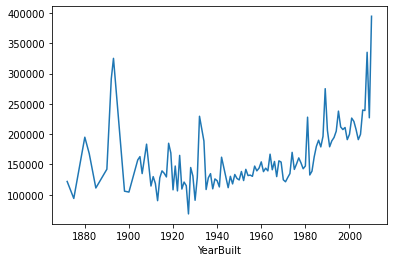

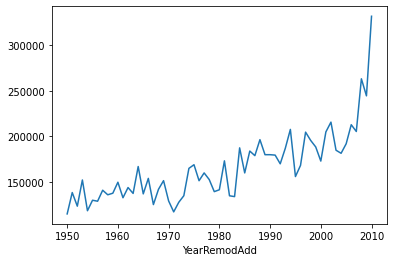

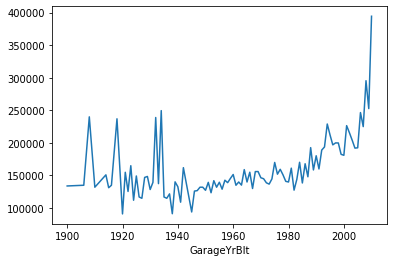

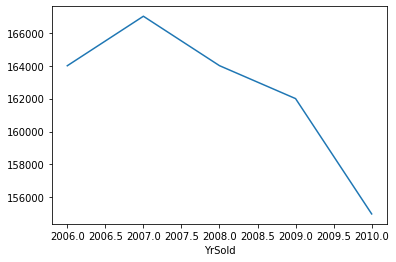

In [97]:
#for y in yrfeature:
for y in yrfeature:
    data.groupby(y)['SalePrice'].median().plot()
    plt.show()

With increasing year, the sales price reduced, which cannot be true

With each garage built, the price is increasing.

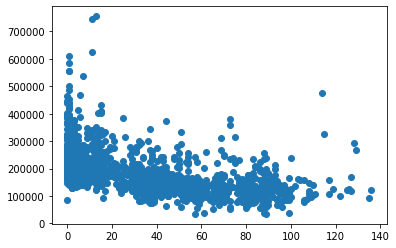

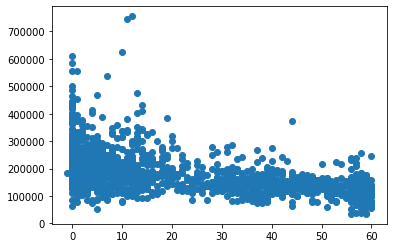

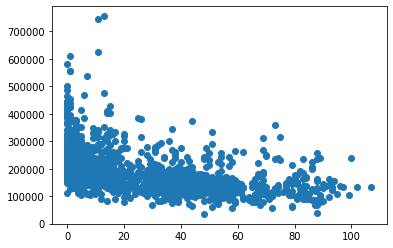

In [84]:
#Finding the price from the year a new feature was added to the house like garage built etc.
dsold = data.copy()
for y in yrfeature:
    if y !='YrSold':
        dsold[y]  = dsold['YrSold'] - dsold[y]
        plt.scatter(dsold[y], dsold['SalePrice'])
        plt.show()
        

In [91]:
#Finding descreate features and their impact on sales price
dsfeature = []
for u in data:
    if len(data[u].unique()) < 25 and u not in yrfeature and u != ['Id']:
        print(u)
        dsfeature.append(u)

MSSubClass
OverallQual
OverallCond
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
3SsnPorch
PoolArea
MiscVal
MoSold


In [92]:
dsfeature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

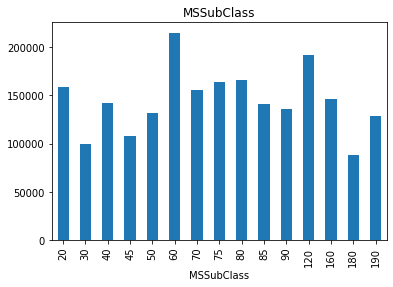

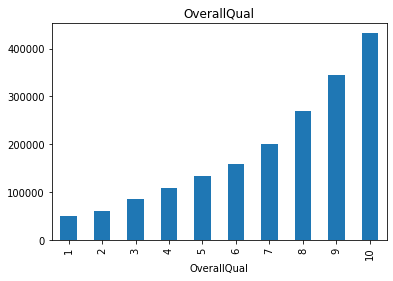

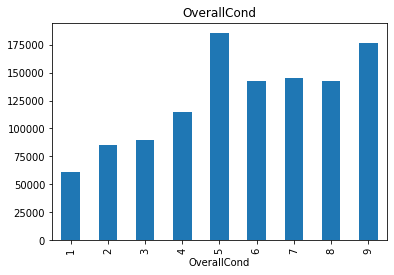

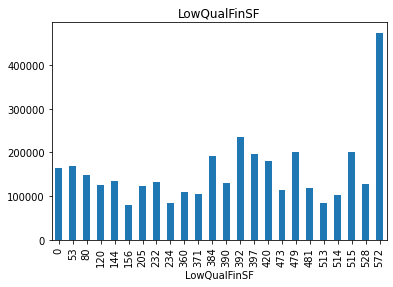

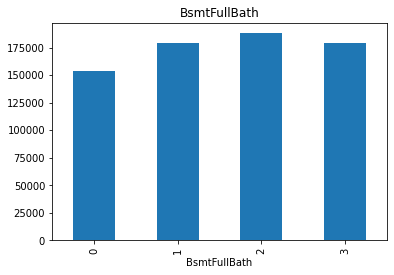

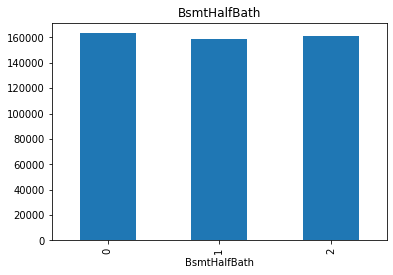

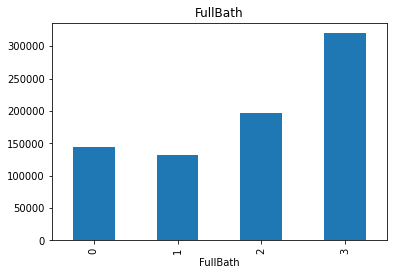

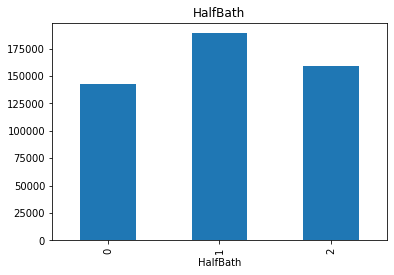

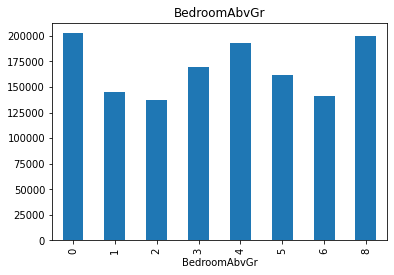

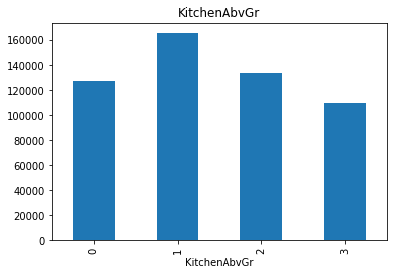

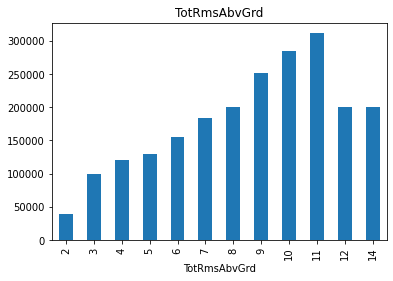

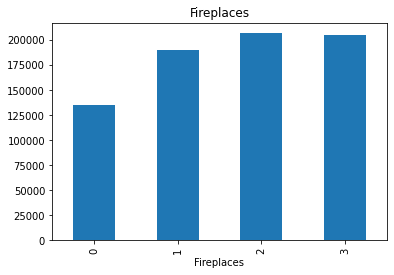

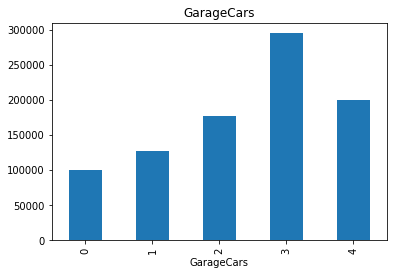

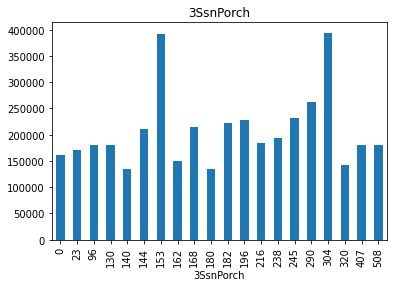

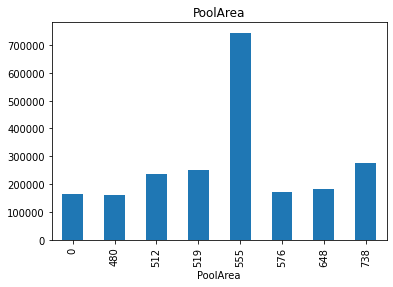

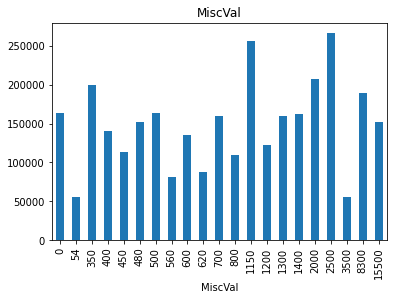

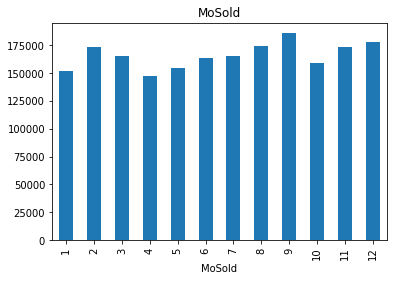

In [96]:
for f in dsfeature:
    data.groupby(f)['SalePrice'].median().plot.bar()
    plt.title(f)
    plt.show()

In [108]:
#Finding continuous features and their impact on sales price
dcfeature = []
for u in data:
    if u not in yrfeature+dsfeature+['Id'] :
        print(u)
        dcfeature.append(u)

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
SalePrice


In [109]:
dcfeature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

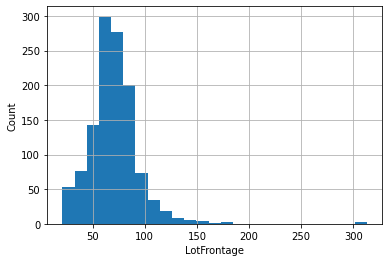

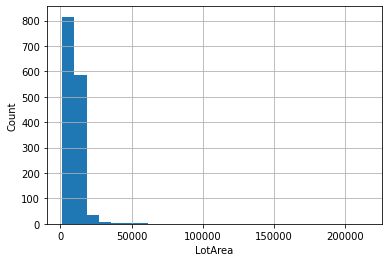

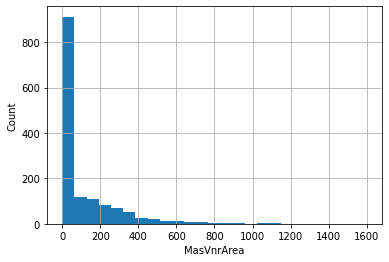

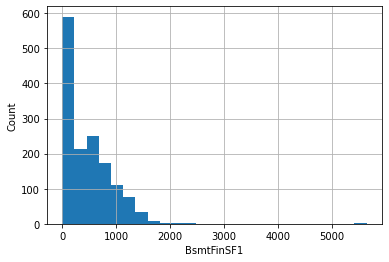

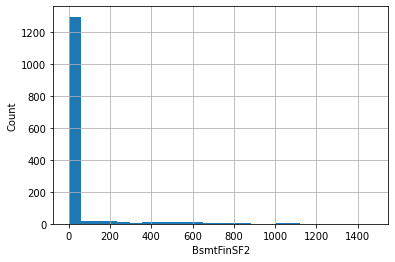

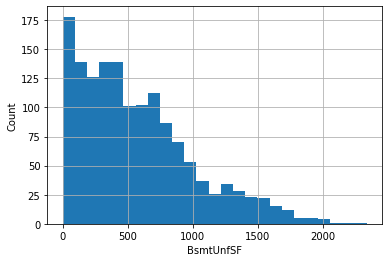

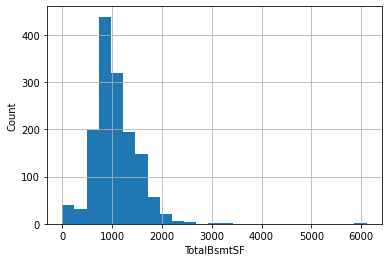

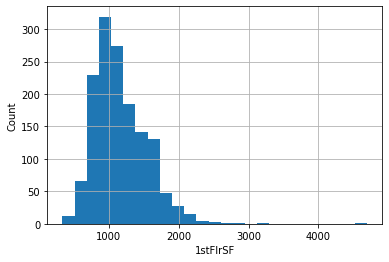

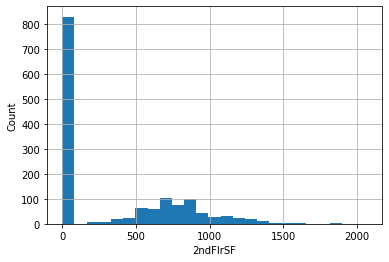

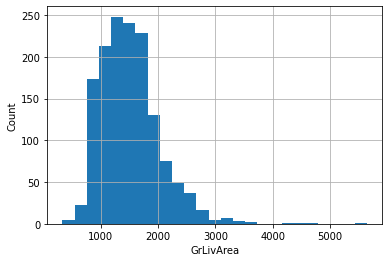

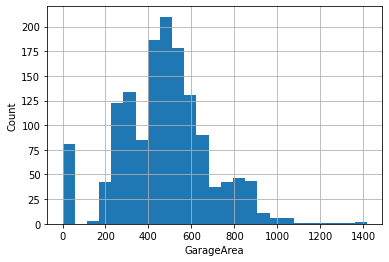

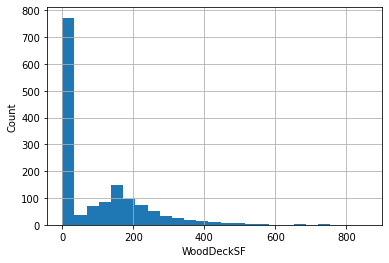

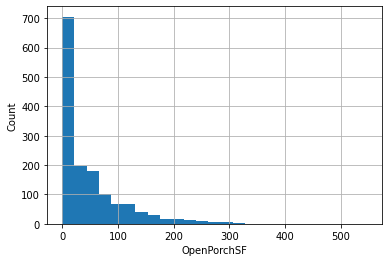

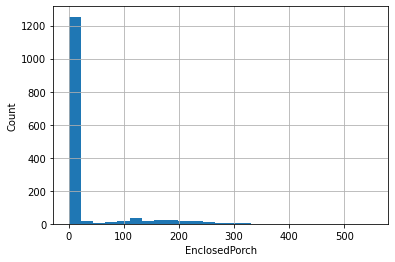

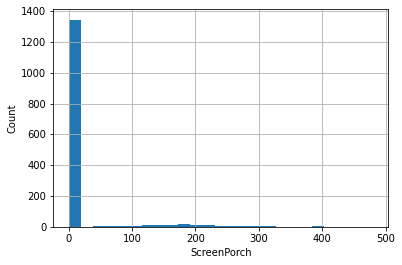

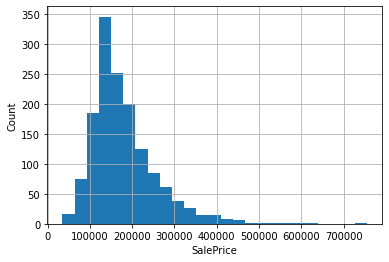

In [110]:
for f in dcfeature:
    data[f].hist(bins = 25)
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.show()

Looks like most of the features are highly skewed to right.

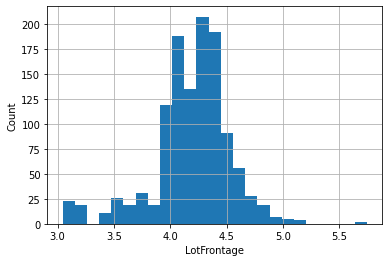

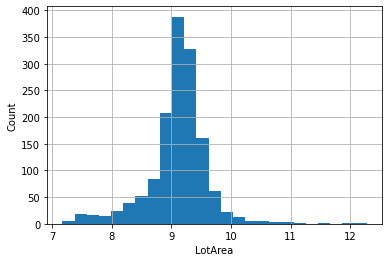

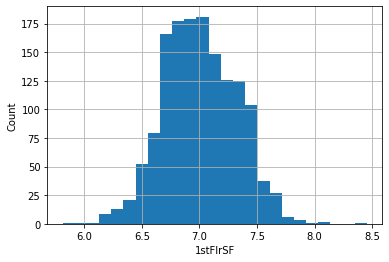

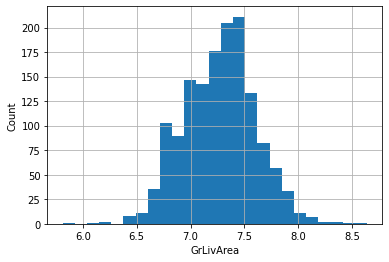

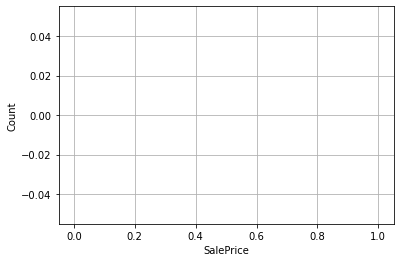

In [113]:
datag = df.copy()
for f in dcfeature:
    if 0 in datag[f].unique():
        pass
    else:
        datag[f] = np.log(datag[f])
        datag['SalePrice']= np.log(datag['SalePrice'])
        datag[f].hist(bins = 25)
        plt.xlabel(f)
        plt.ylabel('Count')
        plt.show()

Most of the data after log transformation looks normally distributed.

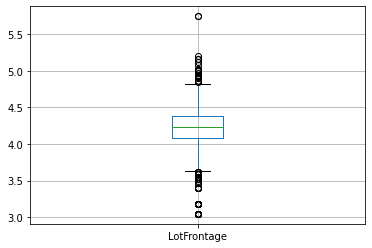

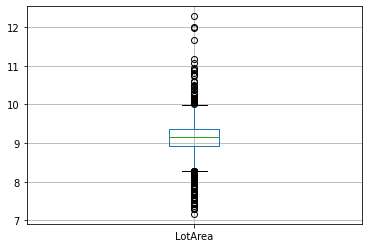

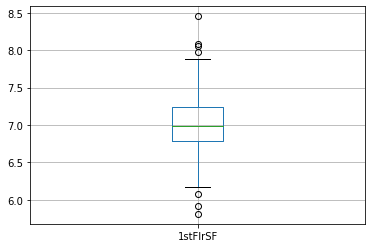

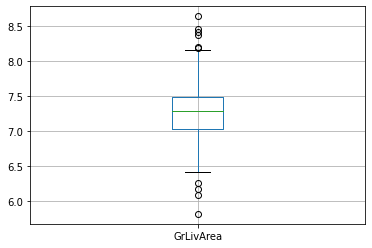

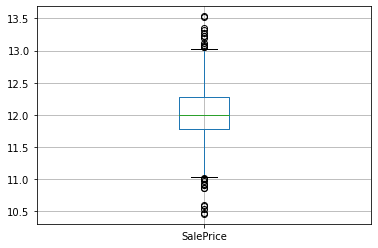

In [117]:
datag = df.copy()
for f in dcfeature:
    if 0 in datag[f].unique():
        pass
    else:
        datag[f] = np.log(datag[f])
        #datag['SalePrice']= np.log(datag['SalePrice'])
        datag.boxplot(column = f)
        #plt.xlabel(f)
        plt.show()

In [120]:
#Catagorical features
catagoricalfeat = [ i for i in datag if datag[i].dtypes=='O']
catagoricalfeat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [121]:
datag[catagoricalfeat].head(2)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal

In [125]:
for i in catagoricalfeat:
    print(i, len(datag[i].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


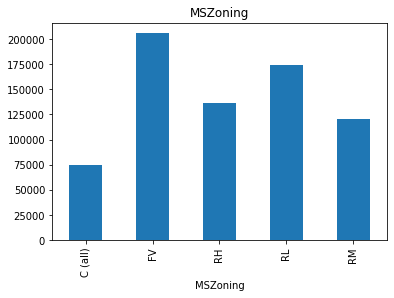

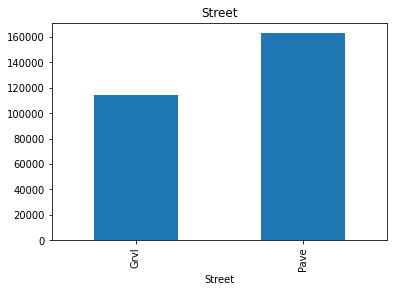

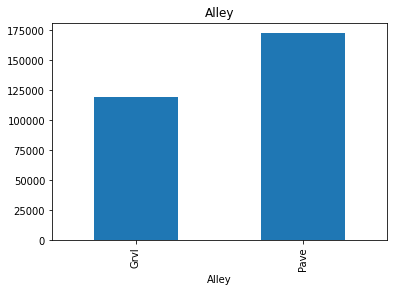

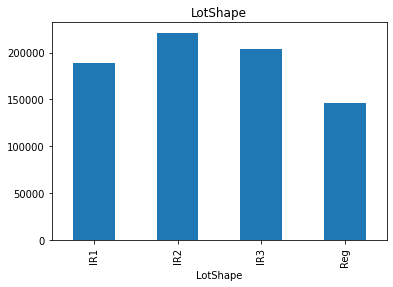

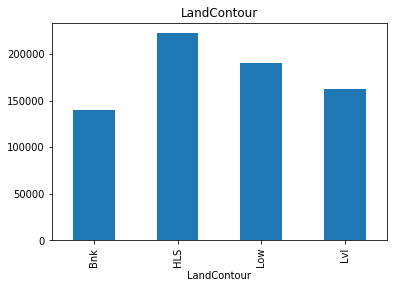

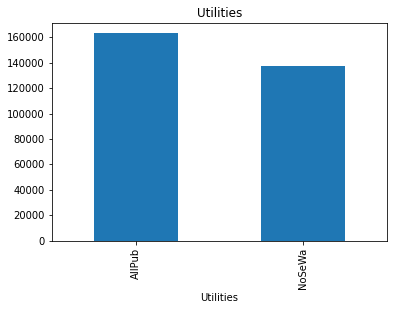

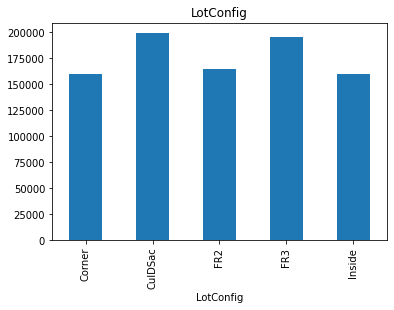

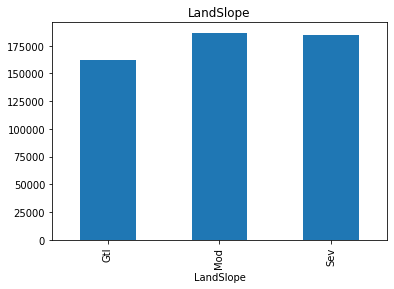

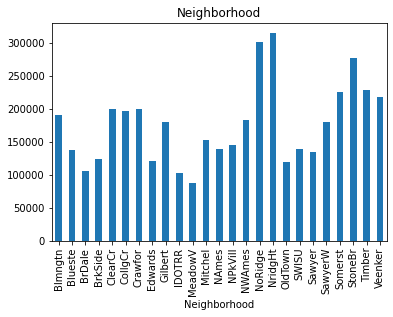

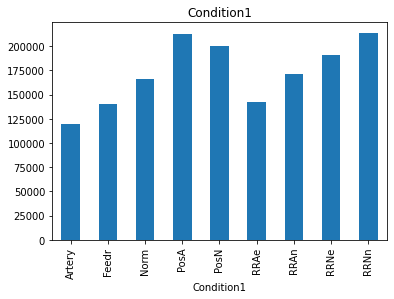

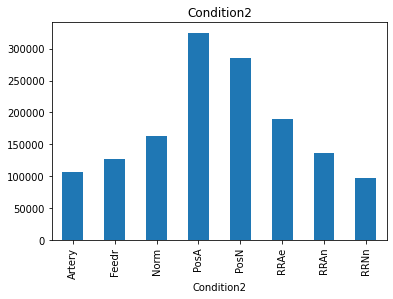

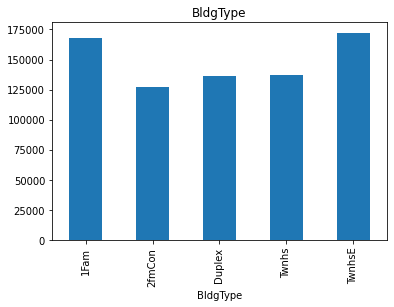

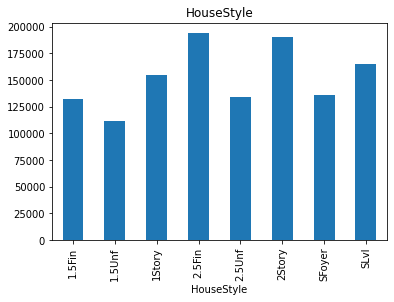

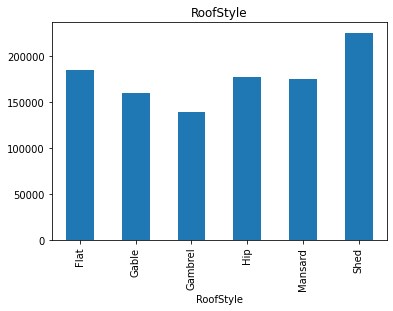

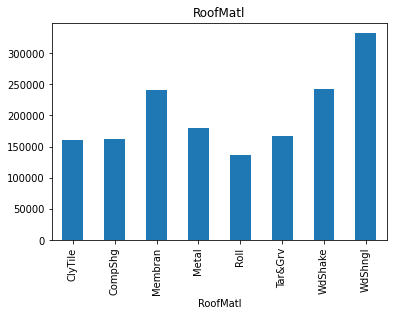

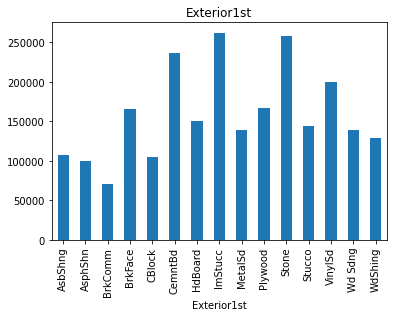

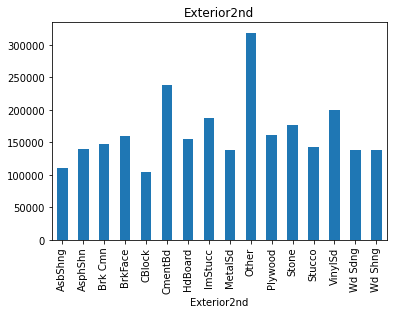

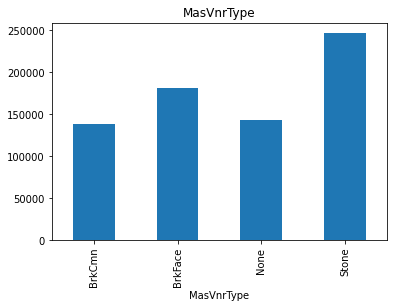

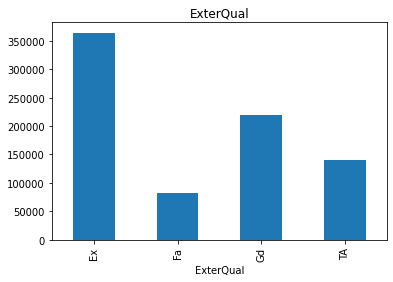

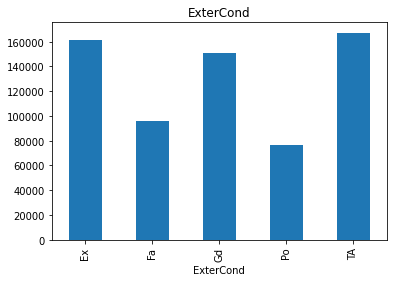

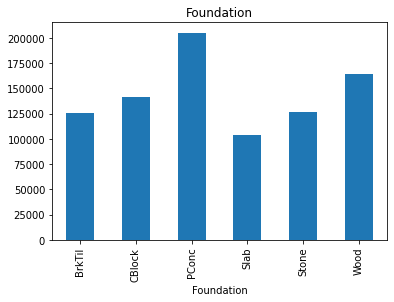

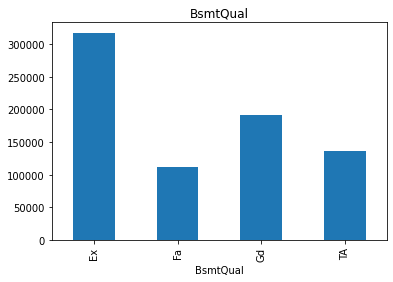

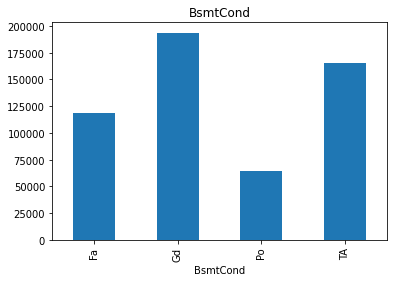

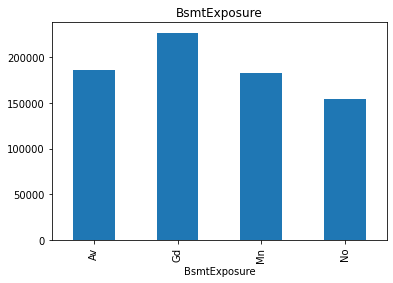

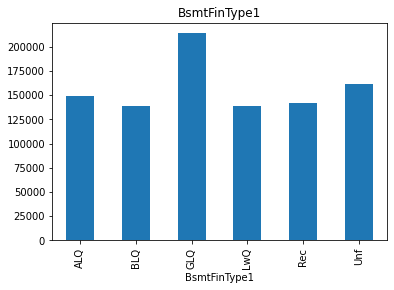

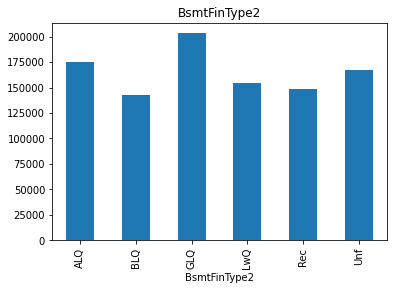

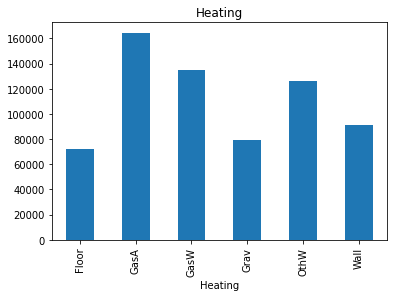

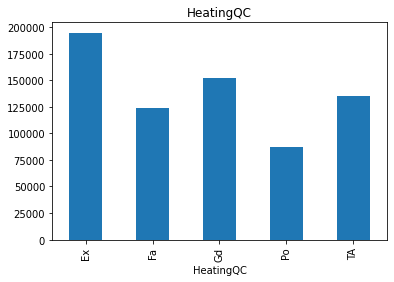

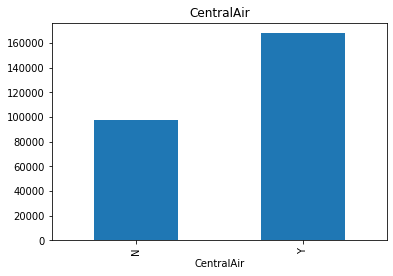

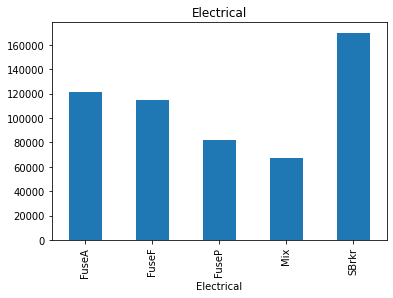

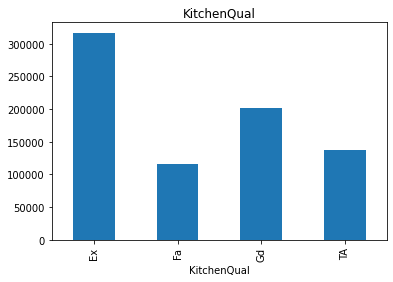

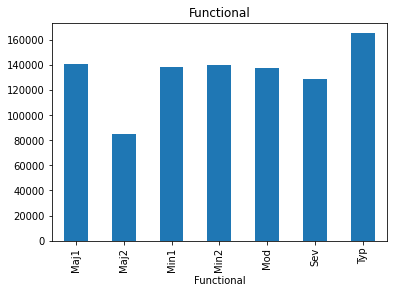

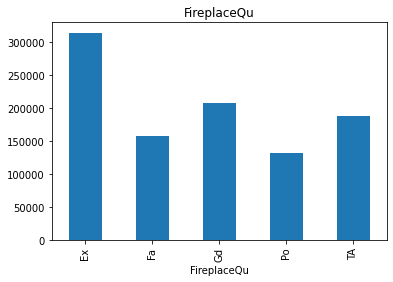

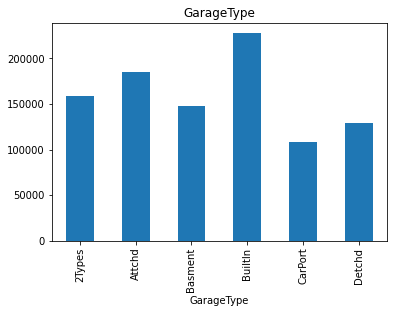

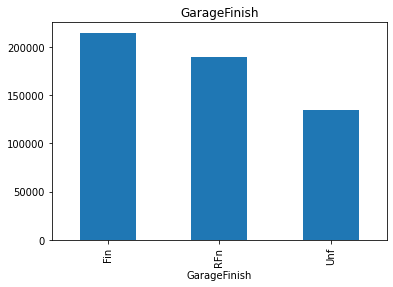

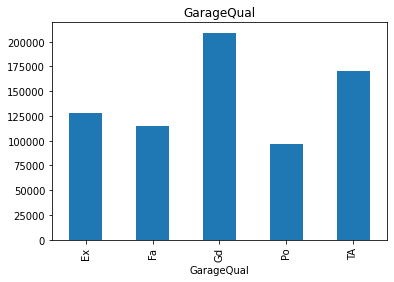

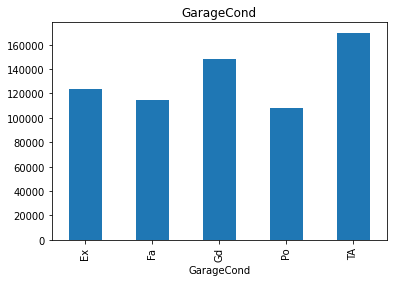

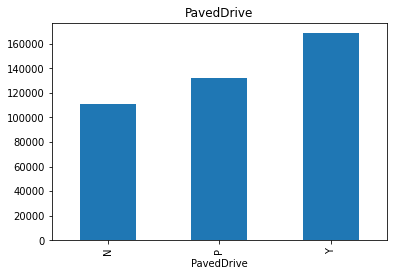

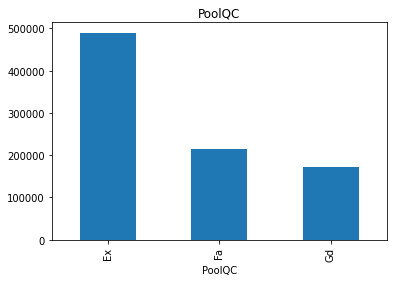

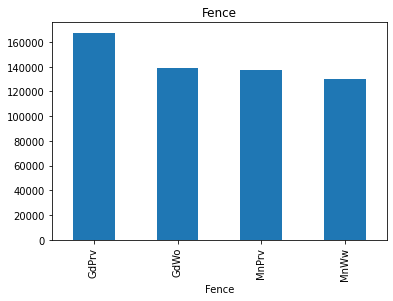

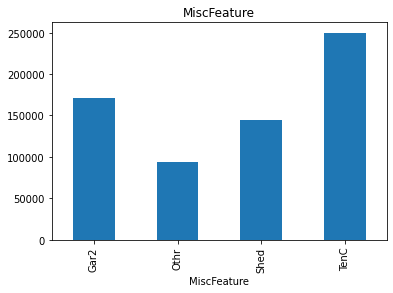

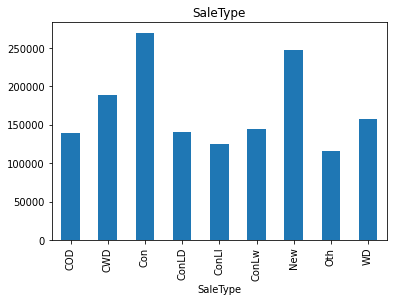

In [ ]:
data = df.copy()
for f in catagoricalfeat:
    data.groupby(f)['SalePrice'].median().plot.bar()
    plt.title(f)
    plt.show()

## Analysis2

In [54]:
data.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [237]:
dt = df.corr() > 0.5
print(dt==True)

                  Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
Id              True       False        False    False        False   
MSSubClass     False        True        False    False        False   
LotFrontage    False       False         True    False        False   
LotArea        False       False        False     True        False   
OverallQual    False       False        False    False         True   
OverallCond    False       False        False    False        False   
YearBuilt      False       False        False    False         True   
YearRemodAdd   False       False        False    False         True   
MasVnrArea     False       False        False    False        False   
BsmtFinSF1     False       False        False    False        False   
BsmtFinSF2     False       False        False    False        False   
BsmtUnfSF      False       False        False    False        False   
TotalBsmtSF    False       False        False    False         True   
1stFlr

<AxesSubplot:>

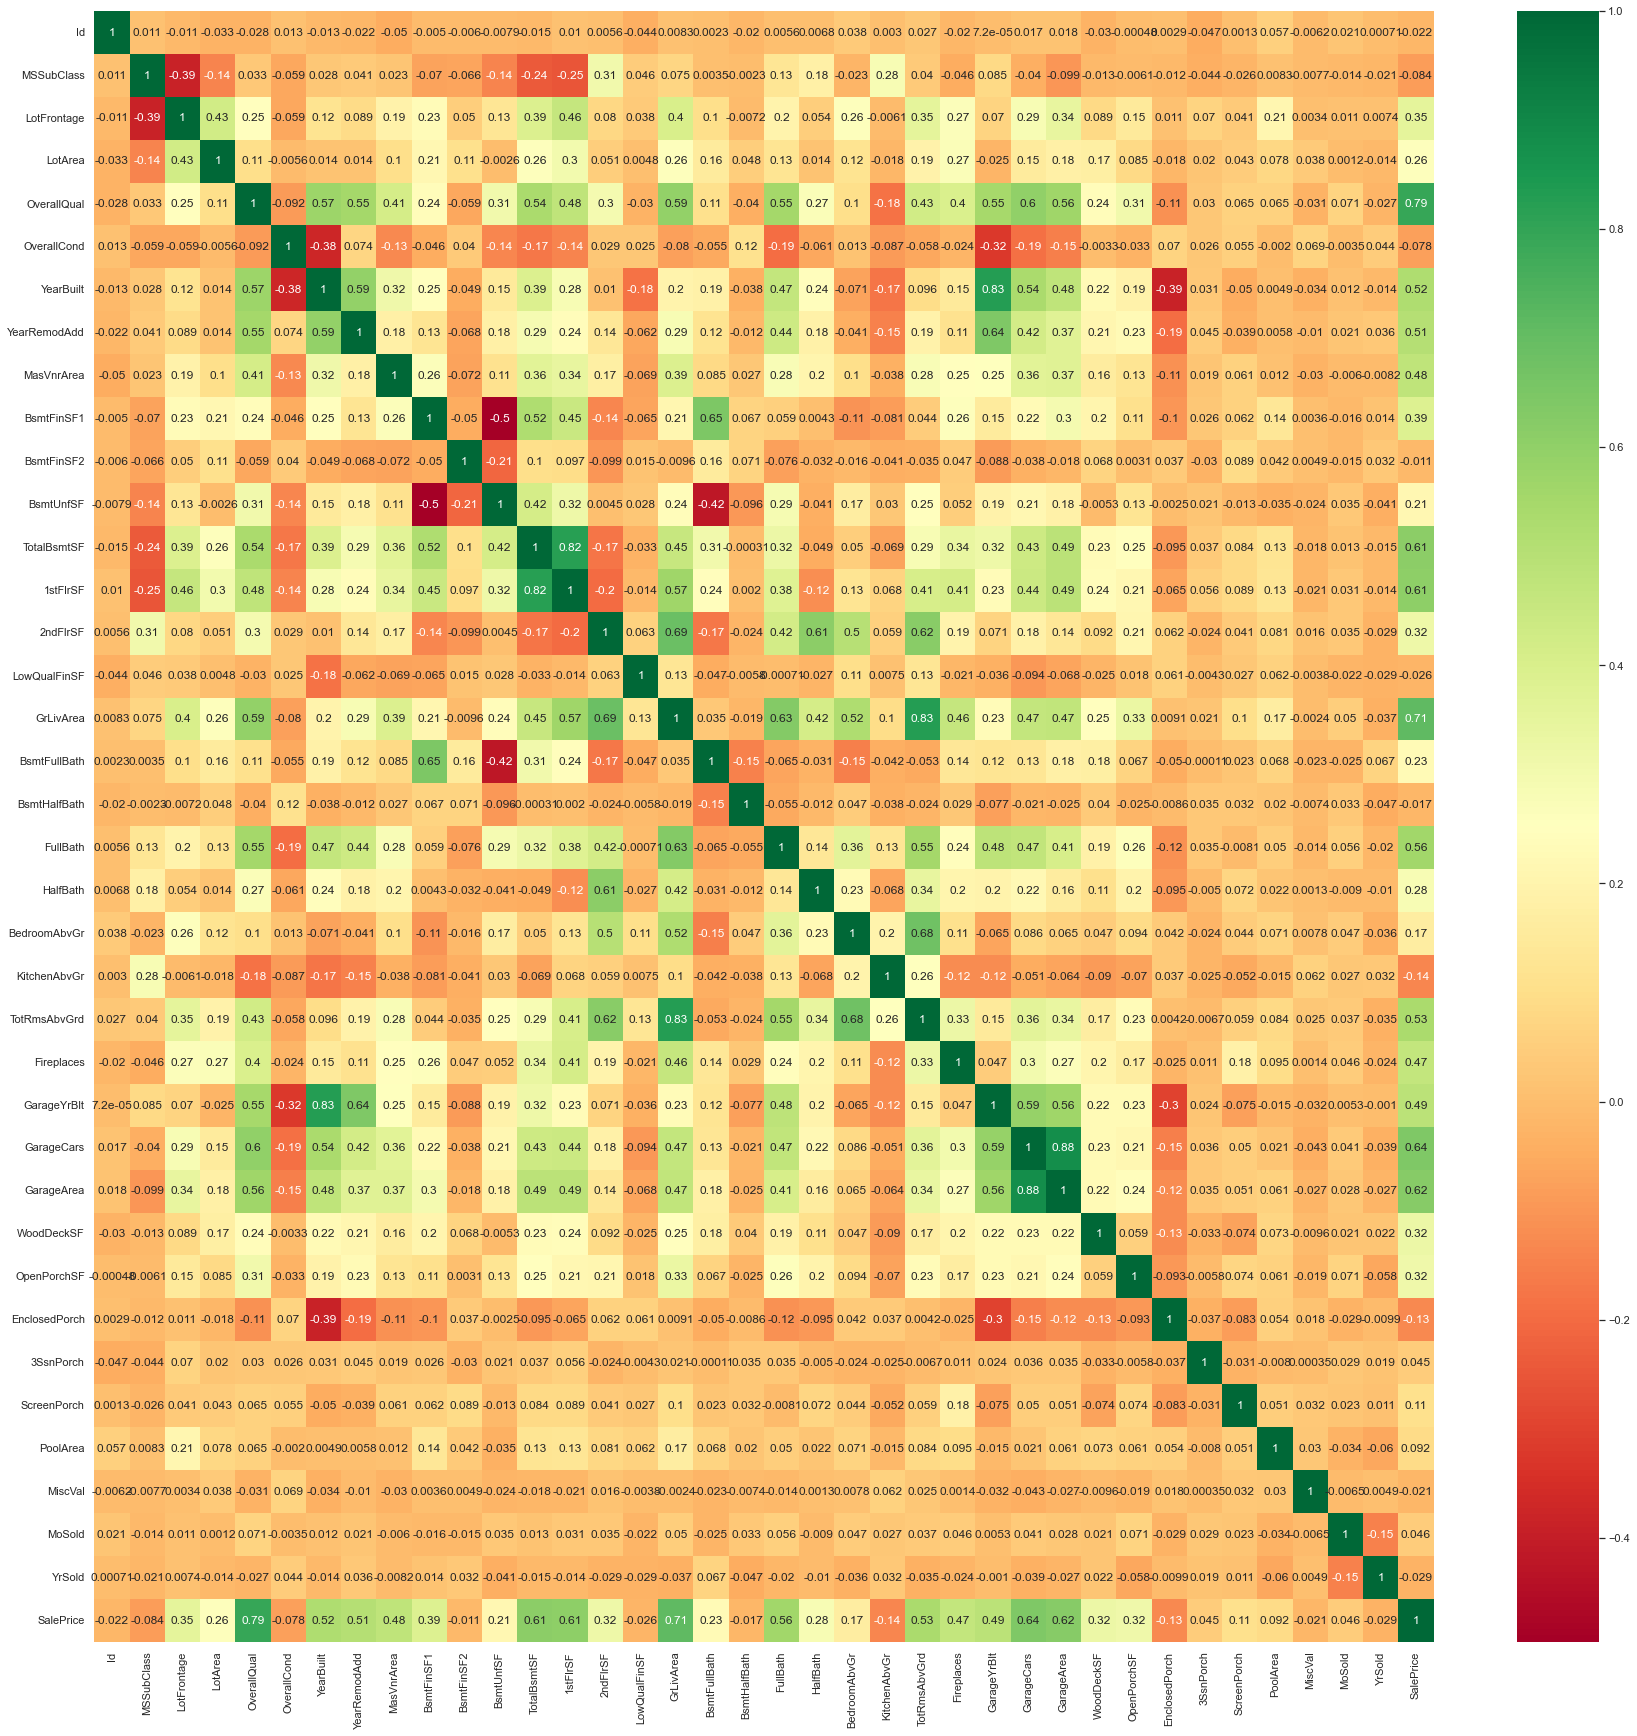

In [221]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), cmap ='RdYlGn', annot = True)
#sns.heatmap(dt, cmap ='RdYlGn', annot = True)

In [238]:
corr_val=0.7
df2 = df.corr().unstack().reset_index()
df3 = df2[df2[0]>corr_val]
df4 = df3[df3[0]!=1]
print(df4)

           level_0       level_1         0
189    OverallQual     SalePrice  0.790982
253      YearBuilt   GarageYrBlt  0.825667
469    TotalBsmtSF      1stFlrSF  0.819530
506       1stFlrSF   TotalBsmtSF  0.819530
631      GrLivArea  TotRmsAbvGrd  0.825489
645      GrLivArea     SalePrice  0.708624
890   TotRmsAbvGrd     GrLivArea  0.825489
956    GarageYrBlt     YearBuilt  0.825667
1015    GarageCars    GarageArea  0.882475
1052    GarageArea    GarageCars  0.882475
1410     SalePrice   OverallQual  0.790982
1422     SalePrice     GrLivArea  0.708624


In [239]:
print(df3[df3[0]==1])

            level_0        level_1    0
0                Id             Id  1.0
39       MSSubClass     MSSubClass  1.0
78      LotFrontage    LotFrontage  1.0
117         LotArea        LotArea  1.0
156     OverallQual    OverallQual  1.0
195     OverallCond    OverallCond  1.0
234       YearBuilt      YearBuilt  1.0
273    YearRemodAdd   YearRemodAdd  1.0
312      MasVnrArea     MasVnrArea  1.0
351      BsmtFinSF1     BsmtFinSF1  1.0
390      BsmtFinSF2     BsmtFinSF2  1.0
429       BsmtUnfSF      BsmtUnfSF  1.0
468     TotalBsmtSF    TotalBsmtSF  1.0
507        1stFlrSF       1stFlrSF  1.0
546        2ndFlrSF       2ndFlrSF  1.0
585    LowQualFinSF   LowQualFinSF  1.0
624       GrLivArea      GrLivArea  1.0
663    BsmtFullBath   BsmtFullBath  1.0
702    BsmtHalfBath   BsmtHalfBath  1.0
741        FullBath       FullBath  1.0
780        HalfBath       HalfBath  1.0
819    BedroomAbvGr   BedroomAbvGr  1.0
858    KitchenAbvGr   KitchenAbvGr  1.0
897    TotRmsAbvGrd   TotRmsAbvGrd  1.0


In [240]:
print(df4[df4[0]==1])

Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [241]:
print(df4)

           level_0       level_1         0
189    OverallQual     SalePrice  0.790982
253      YearBuilt   GarageYrBlt  0.825667
469    TotalBsmtSF      1stFlrSF  0.819530
506       1stFlrSF   TotalBsmtSF  0.819530
631      GrLivArea  TotRmsAbvGrd  0.825489
645      GrLivArea     SalePrice  0.708624
890   TotRmsAbvGrd     GrLivArea  0.825489
956    GarageYrBlt     YearBuilt  0.825667
1015    GarageCars    GarageArea  0.882475
1052    GarageArea    GarageCars  0.882475
1410     SalePrice   OverallQual  0.790982
1422     SalePrice     GrLivArea  0.708624


In [243]:
df.shape

(1460, 81)

In [244]:
#(OverallQual) in df4['level_0']
#print(df4['level_0'])
#[df4.isin(['GrLivArea'])]#.stack()
#df4.str.match('GrLivArea')
#    print('GrLivArea')
#(df4['level_0'] == 'GrLivArea')
#type(df4['level_0'])
#print((df4['level_0'] == 'GrLivArea').any())
print(df4['level_0'].unique())

['OverallQual' 'YearBuilt' 'TotalBsmtSF' '1stFlrSF' 'GrLivArea'
 'TotRmsAbvGrd' 'GarageYrBlt' 'GarageCars' 'GarageArea' 'SalePrice']


In [245]:
for i in df:
    print(i)
    if (df4['level_0'].unique() == i).any() :
        print(i)
    else:
        df.drop(i, axis = 1, inplace= True)
       # df.drop(i, axis = 1, inplace= True)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallQual
OverallCond
YearBuilt
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageYrBlt
GarageFinish
GarageCars
GarageCars
GarageArea
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
SalePrice


In [246]:
df.shape

(1460, 10)

In [247]:
df.head()

OverallQual  YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  TotRmsAbvGrd  \
0            7       2003          856       856       1710             8   
1            6       1976         1262      1262       1262             6   
2            7       2001          920       920       1786             6   
3            7       1915          756       961       1717             7   
4            8       2000         1145      1145       2198             9   

   GarageYrBlt  GarageCars  GarageArea  SalePrice  
0       2003.0           2         548     208500  
1       1976.0           2         460     181500  
2       2001.0           2         608     223500  
3       1998.0           3         642     140000  
4       2000.0           3         836     250000

In [248]:
a = df.values.T
print(a)
cm = np.corrcoef(a)

[[7.00000e+00 6.00000e+00 7.00000e+00 ... 7.00000e+00 5.00000e+00
  5.00000e+00]
 [2.00300e+03 1.97600e+03 2.00100e+03 ... 1.94100e+03 1.95000e+03
  1.96500e+03]
 [8.56000e+02 1.26200e+03 9.20000e+02 ... 1.15200e+03 1.07800e+03
  1.25600e+03]
 ...
 [2.00000e+00 2.00000e+00 2.00000e+00 ... 1.00000e+00 1.00000e+00
  1.00000e+00]
 [5.48000e+02 4.60000e+02 6.08000e+02 ... 2.52000e+02 2.40000e+02
  2.76000e+02]
 [2.08500e+05 1.81500e+05 2.23500e+05 ... 2.66500e+05 1.42125e+05
  1.47500e+05]]


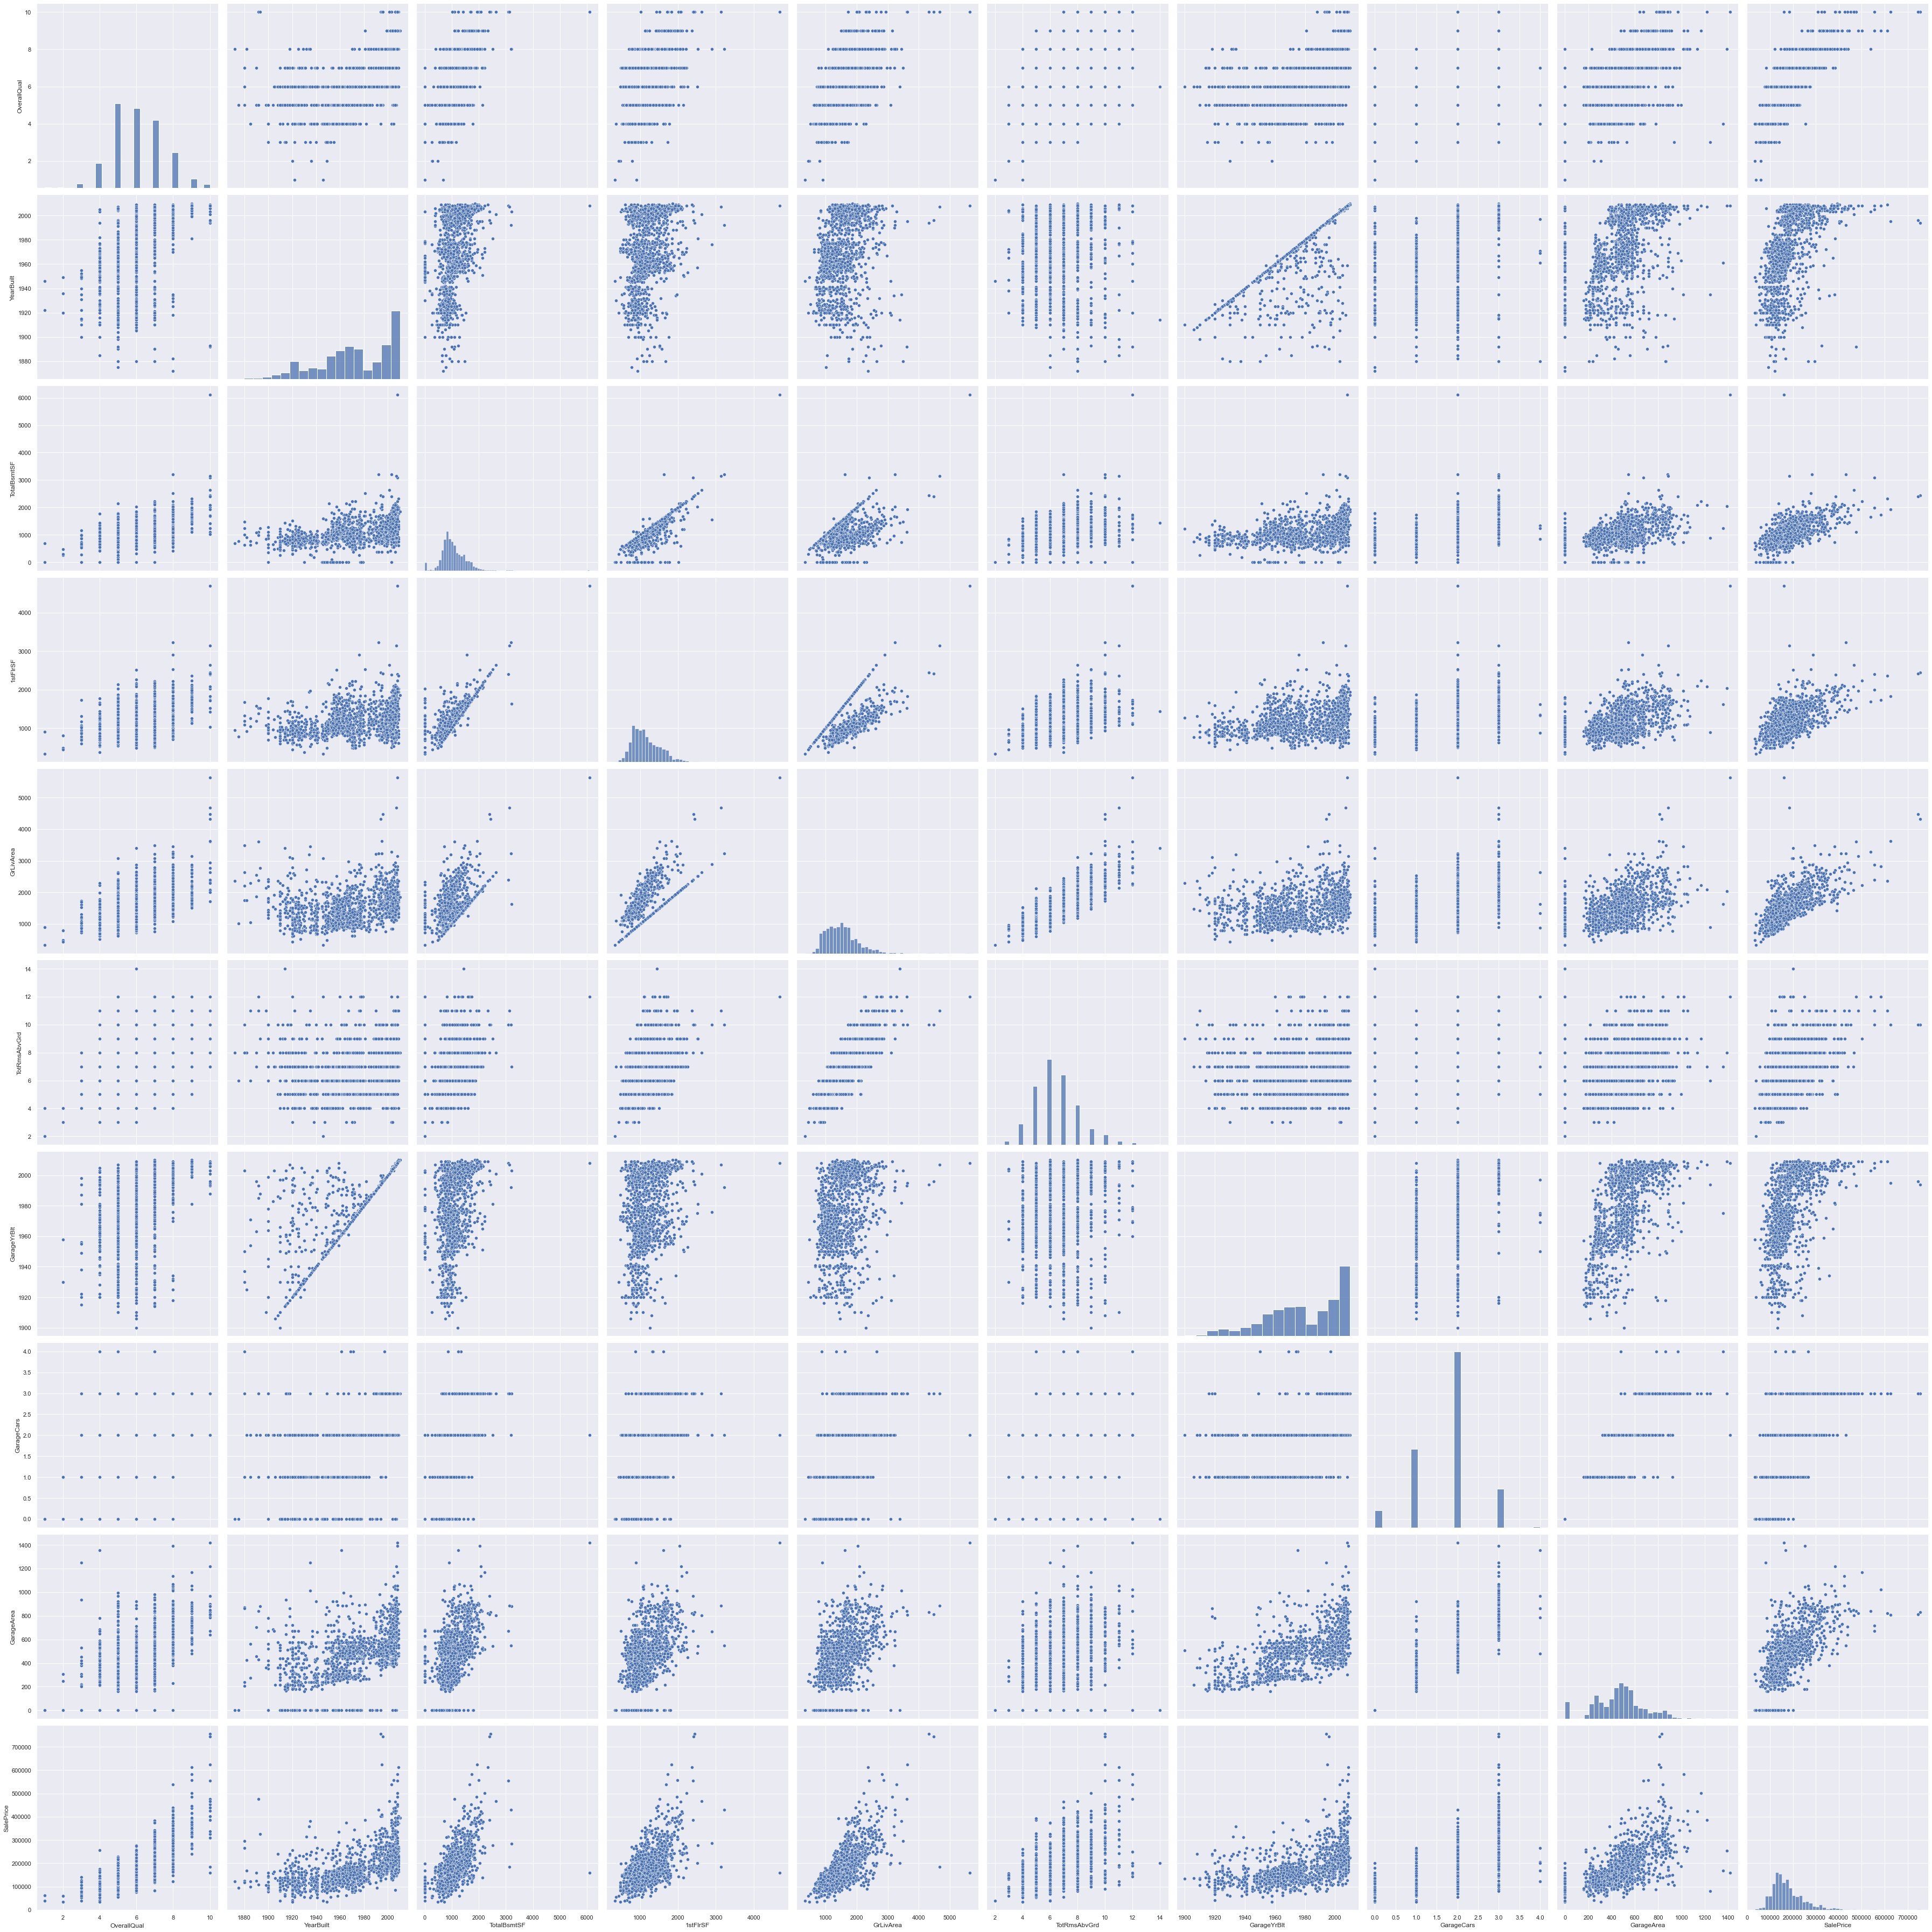

In [250]:
#cm = np.corrcoef(a)#
sns.pairplot(df, height=5)
plt.tight_layout()

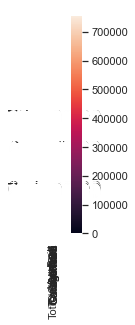

In [253]:
#Correlation-

sns.set(font_scale=1)
hm = sns.heatmap(df,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 20})


<AxesSubplot:>

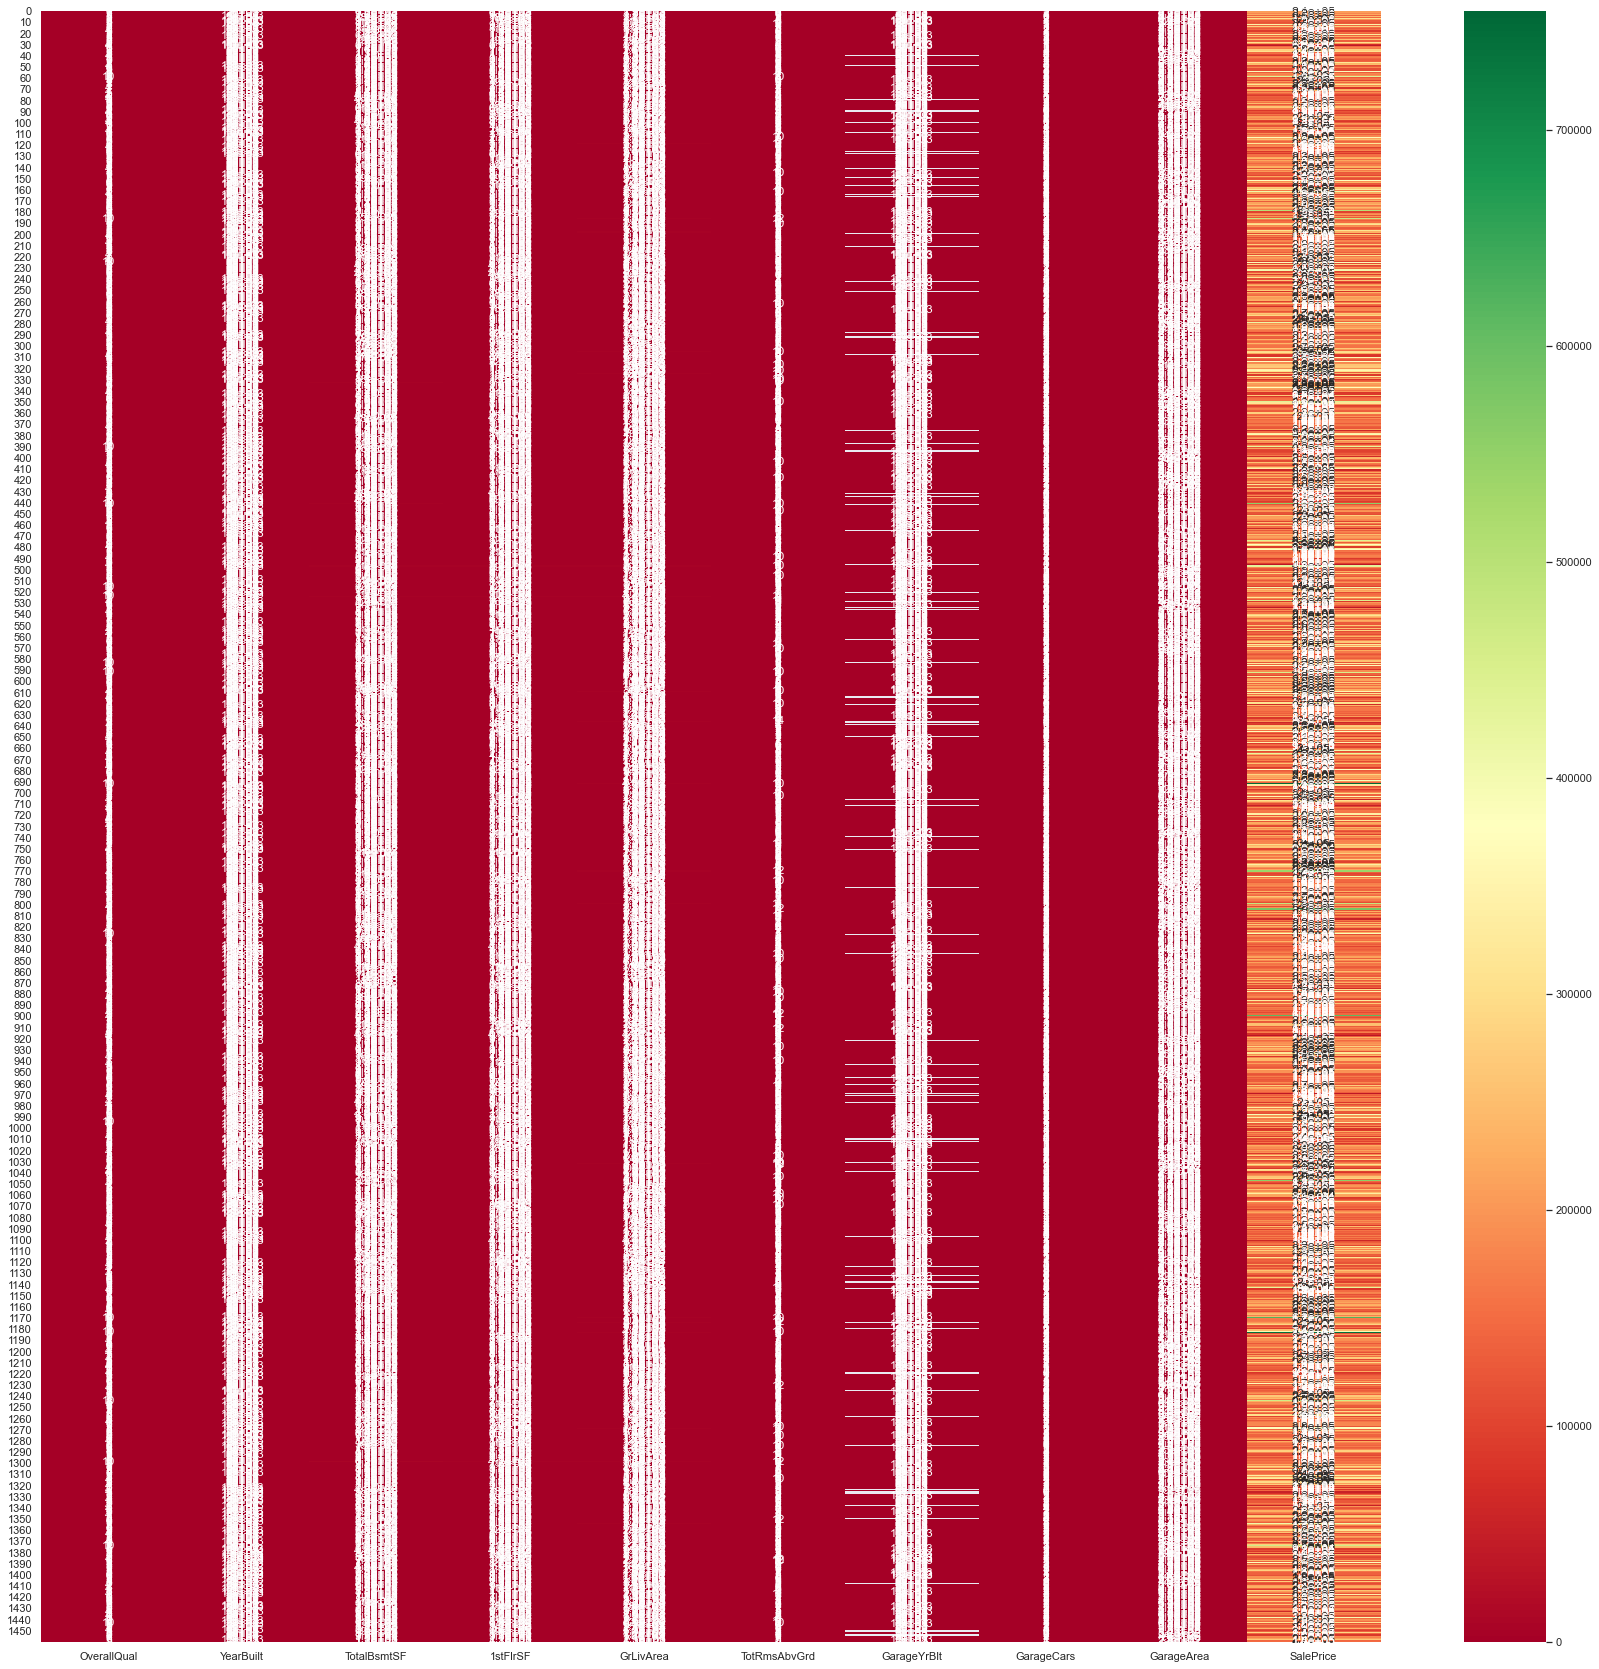

In [256]:
plt.figure(figsize=(30, 30))
sns.heatmap(df, cmap ='RdYlGn', annot = True)